In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def KMeans(matrix, k, max_iter = 1024, eps = 1e-7):
    u = np.zeros((k, np.size(matrix, 1)))
    
    for i in range(np.size(u, 0)):
        u[i] = np.min(matrix, 0).astype(float)
        u[i] += np.random.rand(np.size(matrix, 1)) * (np.max(matrix, 0) - u[i])
    
    ans = np.zeros(np.size(matrix, 1))
    
    for i in range(max_iter):
        clusters = {}
        for i in range(np.size(matrix, 0)):
            min_j = np.linalg.norm(matrix[i] - u[0])
            min_ind = 0
            for j in range(np.size(u, 0)):
                metric = np.linalg.norm(matrix[i] - u[j])
                if metric < min_j:
                    min_j = metric
                    min_ind = j
            temp = clusters.get(min_ind)
            if temp == None:
                clusters.update({min_ind: [i]})
            else:
                temp.append(i)
        
        t = np.copy(u)
        
        for i in range(np.size(u, 0)):
            temp = clusters.get(i)
            if temp != None:
                u[i] = np.average(matrix[temp], axis = 0)
        
        flag = 1
        for i in range(np.size(u, 0)):
            if np.linalg.norm(u[i] - t[i]) >= eps:
                flag = 0
                break
        
        if flag:
            break
    
    ans = np.zeros((np.size(matrix, 0), 1))
    for key in clusters:
        ans[clusters[key]] = [key]
    ans += 1
    return ans

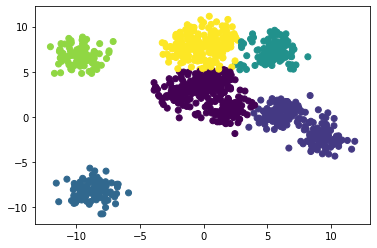

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2, centers=10, random_state=0)
plt.scatter(X[:,0], X[:,1], c = KMeans(X, 7))

# 1. Исследовать зависимость от стратегии начальной инициализации

Можно выбрать в качестве центра случайные точки в $n$-мерном параллелепипеде с границами в минимумах и максимумах заданного набора точек (стороны параллелепипеда параллельны соответствующим осям). Это и было реализовано в данном алгоритме. Но это достаточно плохо, например:

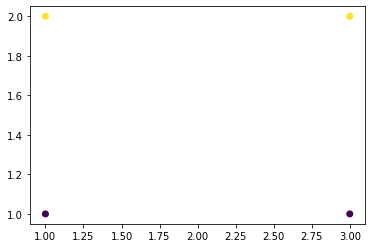

In [8]:
X = np.array([[1,1],[1,2],[3,1],[3,2]])
plt.scatter(X[:,0], X[:,1], c = KMeans(X, 2))

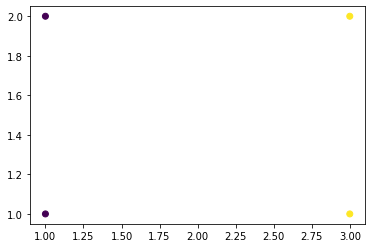

In [5]:
X = np.array([[1,1],[1,2],[3,1],[3,2]])
plt.scatter(X[:,0], X[:,1], c = KMeans(X, 2))

Можно выбирать начальные центры как в k-means++:

 • Первый центр - случайная точка
 
 • Каждый следующий центр, центр дальше всего от предыдущих центров, выбор основан на взвешенной оценке вероятности
 
 Пример, так же иллюстрирующий чувствительность к начальной инициализации:

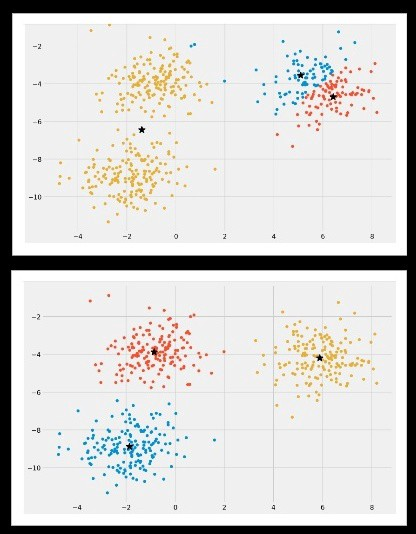

И наконец можно выбрать первый центр как одну из точек, далее $ n$-ый центр тоже как одну из точек и при этом расстояние от неё до всех предыдущих точек в сумме должно быть максимальным. Проблема такой инициализации в том, что очень далекие от "кучек" точки, могут очень сильно повлиять на кластеризацию, т.е. если к картинке выше добавить две достаточно далекие точки и нам нужно сделать три кластера, то в одном кластере будут все три кучки, в остальных двух - по одной далекой точке.

Как лучше всего разбивать на кластеры? Неизвестно т.к. это зависит от задачи к которой применяется кластеризация, она всегда может быть неоднозначной.

# 2. Исследовать, для каких задач подходит / не подходит

K-means используется в сегментации рынка, кластеризации документов, сегментации изображений, сжатие изображений и т.д.

Если говорить конкретно про кластеризацию, то k-means не работает, для сферических данных (хотя есть другие методы, которые с этим справляются).

Например:

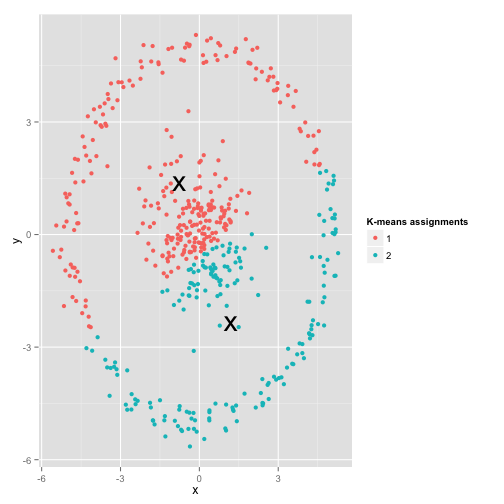

Но достаточно прилично справляется с конфигурациями "шаровой формы".

# 3. Предложить и исследовать стратегию выбора числа кластеров

Можно запустить k-means несколько раз с количеством кластеров $ 1, ... , k$, и посчитать среднее арифметическое от среднего арифметического расстояний от центра кластера до его точек среди всех кластеров. После этого на графике зависимости от этой величины и $ 1, ... , k$ между соседними по абсциссе тремя точками найти самый острый угол, точка абсцисса которой в середине и будет предполагаемым ответом.

# 4. Исследовать зависимость (скорости настройки) от объёма данных / сложности задачи

Если $ d$ - размерность евклидова пространства, $ n$ - количество точек, $ k$ - количество кластеров и $ max\_iter$ - максимальное количество итераций, то сложность очевидно будет равна $ O(n * d * k * $ $ max\_iter) $.

В общем случае k-means является NP-полной задачей.

# 5. Предложить эвристику для визуализации матрицы попарных расстояний

Можно упорядочить кластеры, по среднему внутри кластерному расстоянию до центра, а точках в самих кластерах упорядочить по расстоянию до центра.

Кластеры, например должны быть расположены по не убыванию и сами точки в кластерах так же по не убыванию.